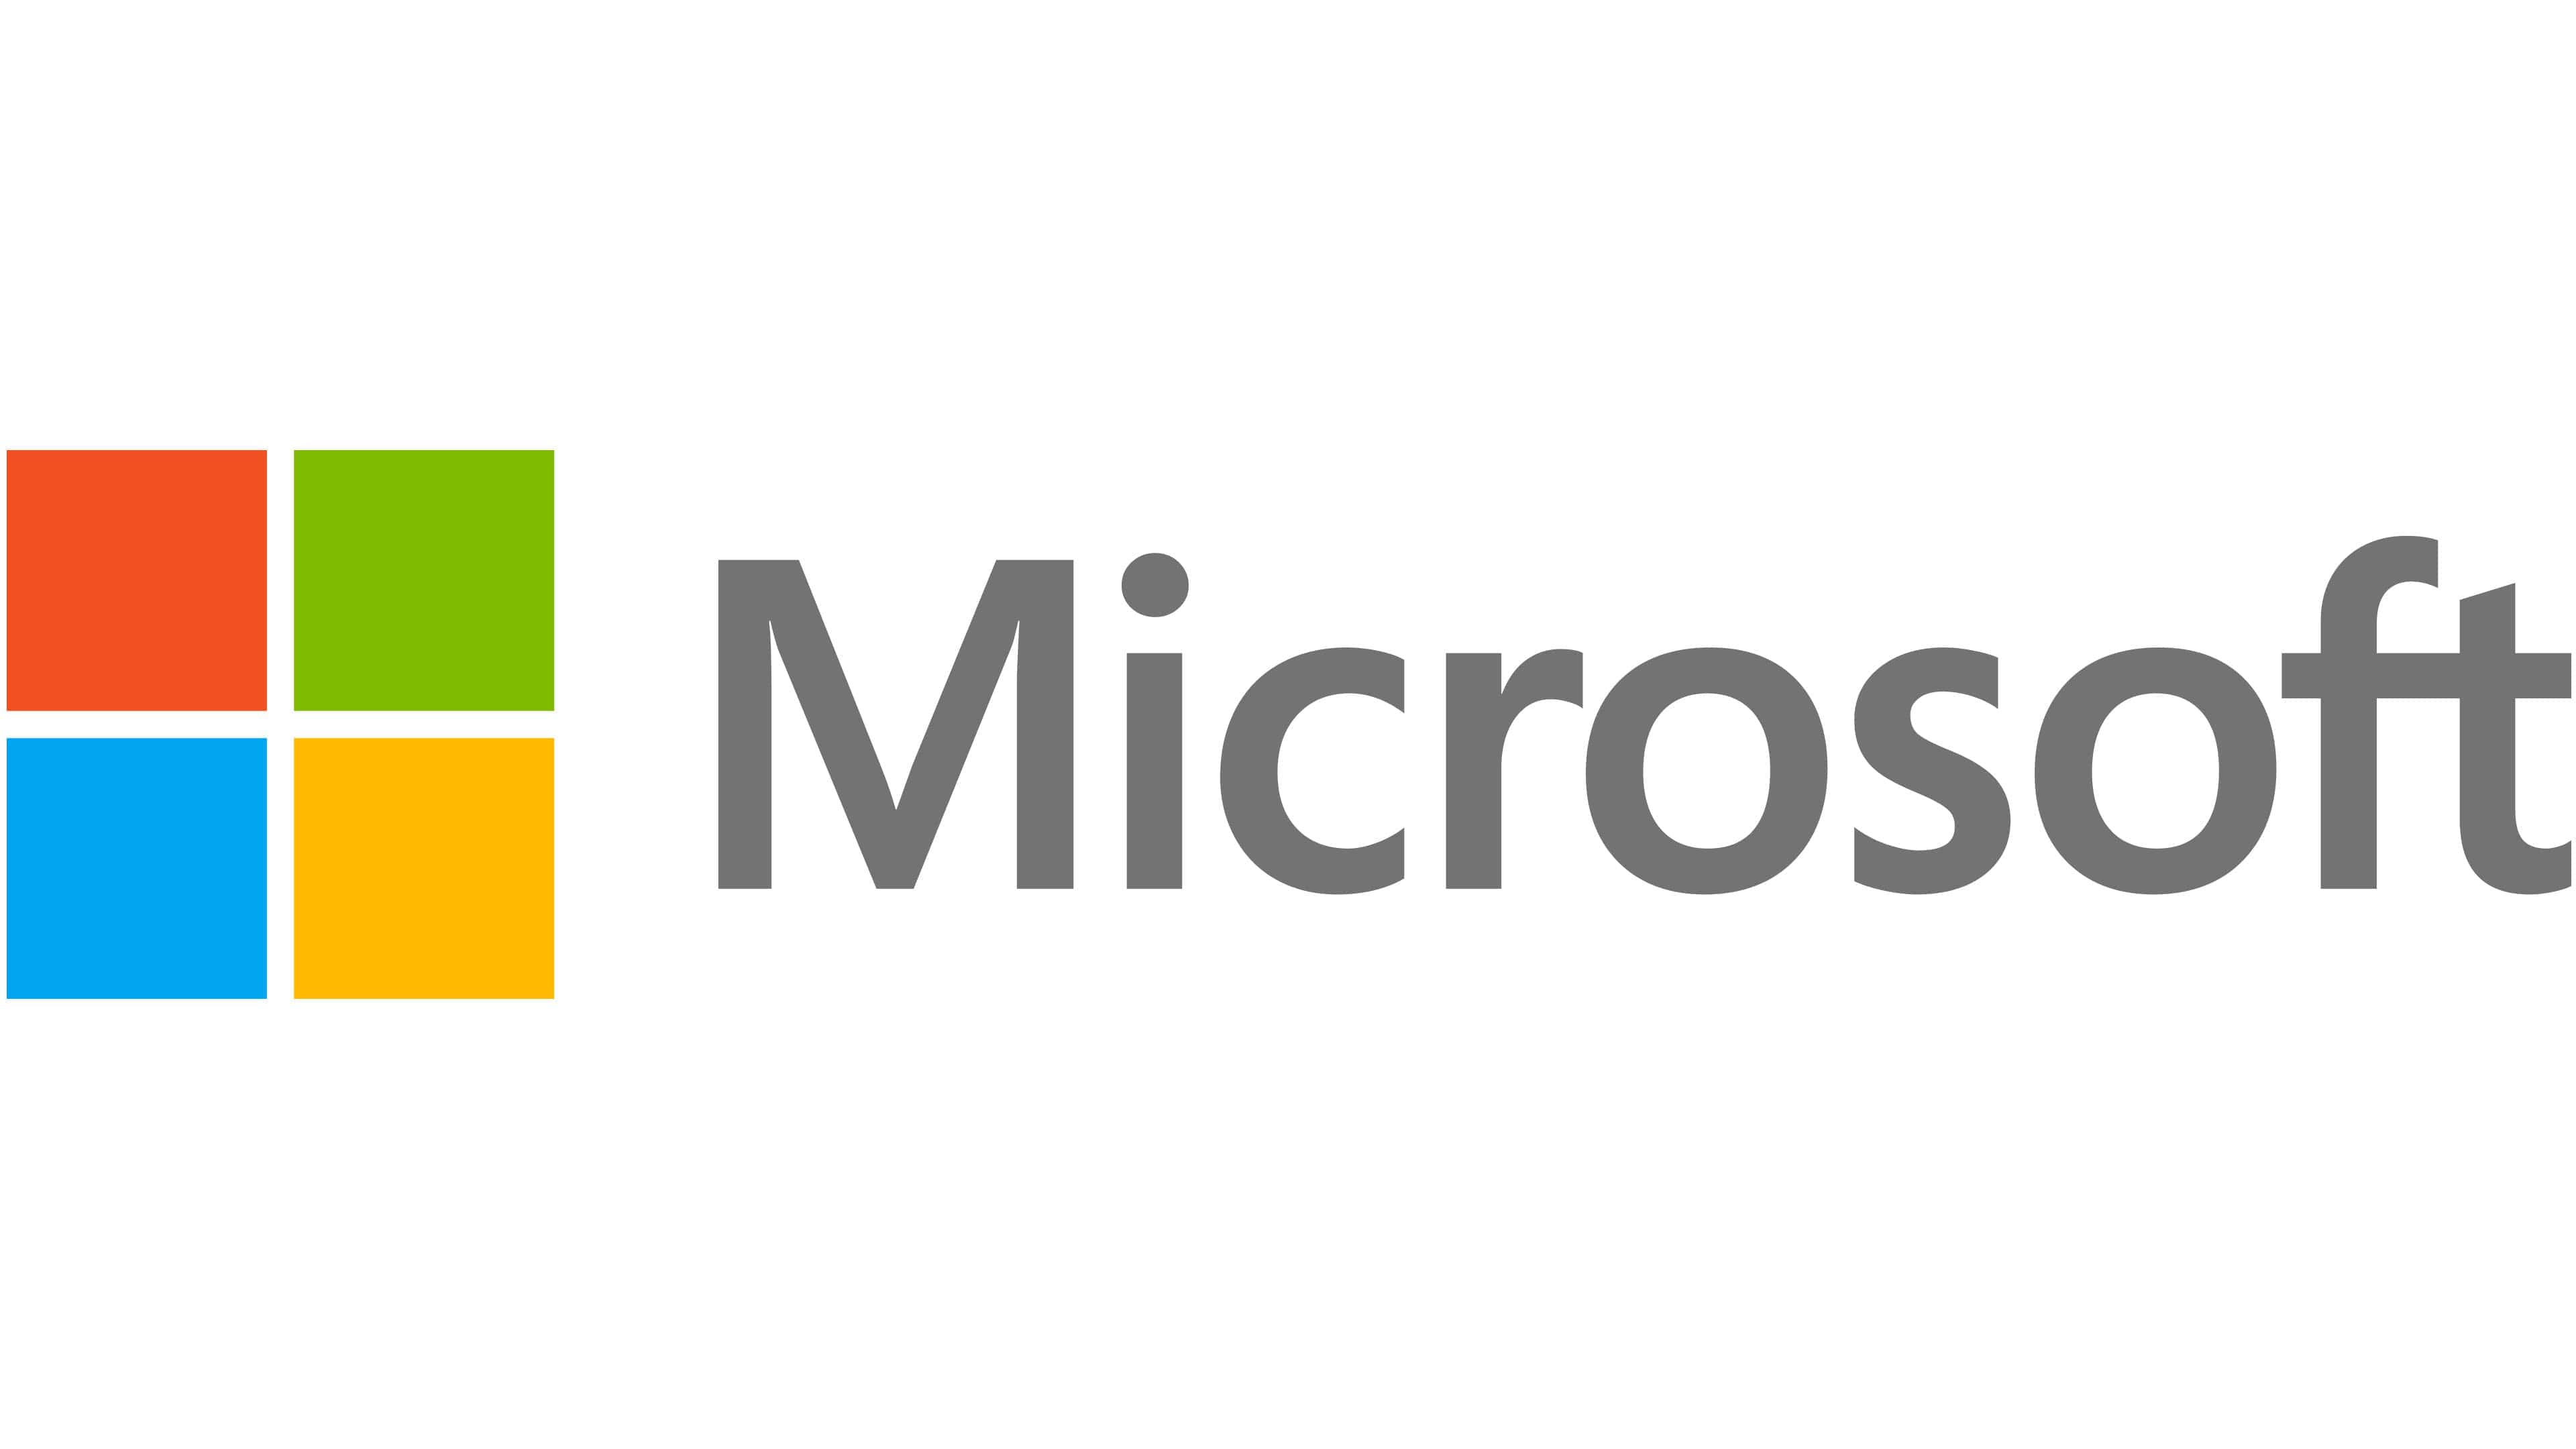

# Theoretical New Microsoft Movie Studio

Author: [Westin Swager](https://github.com/wswager)

## Overview

An analysis of data from [IMDB](https://www.imdb.com/) and [Box Office Mojo](https://www.boxofficemojo.com/) indicating features of movies which correlate with higher total gross.  The theoretical scenario for the analysis was Microsoft seeking insight for the creation of a new movie studio.  This analysis could be used, within the theoretical scenario, by Microsoft to target specific factors for the films produced by its new studio which would increase the likelihood of a higher total gross.

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Data

### [IMDB](https://www.imdb.com/)

An online database of information related to films, television programs, home videos, video games, and streaming content.

Data downloaded from [IMDB](https://www.imdb.com/) was:
* **Genre** - Which types of movies tend toward higher total gross revenues?


* **Average Rating** - Does the rating of a movie by fans correlate with higher total gross revenue?
(number of votes was also accounted for in order to identify potential outliers which may have a comparatively small quantity of passionate voters, potentially positive or negative, which is not representative of the larger population of people who saw the movie)


### [Box Office Mojo](https://www.boxofficemojo.com/)

A website owned by IMDB which tracks box office revenue of films.

Data downloaded from [Box Office Mojo](https://www.boxofficemojo.com/) was the domestic gross revenue and foreign gross revenue of movies released between 2010 and 2018.  A total gross revenue derived from the sum of the domestic gross revenue and foreign gross revenue as the metric against which individual variables were compared.

* **Foreign Gross Ratio** - Does the ratio of the foreign gross revenue correlate with higher total gross revenue?

In [352]:
#Import pandas for Dataframes
import pandas as pd

#Import Numpy and Math for mathematical functions
import numpy as np
import math

#Import Matplotlib and Seaborn for visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### [Box Office Mojo](https://www.boxofficemojo.com/) Gross Data

In [353]:
df_bom_gross = pd.read_csv(r'C:\Users\westi\Documents\GitHub\microsoft_new_movie_studio_example\data\bom.movie_gross.csv')
df_bom_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


### [IMDB](https://www.imdb.com/) Title Basics Data

In [354]:
df_imbd_title_basics = pd.read_csv(r'C:\Users\westi\Documents\GitHub\microsoft_new_movie_studio_example\data\title.basics.csv')
df_imbd_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


### [IMDB](https://www.imdb.com/) Title Ratings Data

In [355]:
df_imbd_title_ratings = pd.read_csv(r'C:\Users\westi\Documents\GitHub\microsoft_new_movie_studio_example\data\title.ratings.csv')
df_imbd_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## Methods

In order to draw direct comparisons between the questioned variables and total gross the following steps were taken:
* Matching the release year range of the [Box Office Mojo](https://www.boxofficemojo.com/) Data and [IMDB](https://www.imdb.com/) Data.
* Creating a total gross revenue, the sum of domestic gross revenue and foreign gross revenue, for each movie.
* Remove extraneous information from various datasets not associated with identified variables.
* Combined the various datasets into a single dataframe from which all of the identified variables associated with each movie can be compared directly with its total gross revenue.

In [356]:
bom_gross_year_range = sorted(list(df_bom_gross['year'].unique()))
print('Release year range for bom_gross =', min(bom_gross_year_range),
      '-', max(bom_gross_year_range))

#Identify the release year range for bom_gross.

Release year range for bom_gross = 2010 - 2018


In [357]:
imbd_title_basics_year_range = sorted(list(df_imbd_title_basics['start_year'].unique()))
print('Release year range for imbd_title_basics =', 
      min(imbd_title_basics_year_range), '-', 
      max(imbd_title_basics_year_range))

#Identify the release year range for imbd_title_basics.

Release year range for imbd_title_basics = 2010 - 2115


In [358]:
df_imbd_title_basics_2010_2018 = df_imbd_title_basics[df_imbd_title_basics['start_year'] <= 2018]
imbd_title_basics_2010_2018_year_range = sorted(list(df_imbd_title_basics_2010_2018['start_year'].unique()))
print('Release year range for imbd_title_basics_2010_2018 =',
      min(imbd_title_basics_2010_2018_year_range),
      '-', max(imbd_title_basics_2010_2018_year_range))

#Remove movies from imbd_title_basics released outside of the release
#year range for bom_gross in order to allow the datasets to match.

Release year range for imbd_title_basics_2010_2018 = 2010 - 2018


In [359]:
df_bom_gross.drop('studio', axis = 1, inplace = True)

#Remove studio column.
#As Microsoft would be the studio for any movies it releases,
#this information is not pertinent.

In [360]:
df_bom_gross['domestic_gross'].fillna(0, inplace = True)
df_bom_gross['foreign_gross'].fillna(0, inplace = True)

#Fill missing values for bom_gross domestic_gross and foreign_gross with 0.
#allowing for eventual sum of domestic_gross and foreign_gross,
#representing only the available value.

In [361]:
df_bom_gross['domestic_gross'] = df_bom_gross['domestic_gross'].astype(int)

df_bom_gross['foreign_gross'] = df_bom_gross['foreign_gross'].astype(str)
df_bom_gross['foreign_gross'] = df_bom_gross['foreign_gross'].str.replace(',', '')
df_bom_gross['foreign_gross'] = df_bom_gross['foreign_gross'].astype(float).astype(int)

#Convert bom_gross domestic_gross and foreign_gross to int,
#allowing for eventual sum of domestic_gross and foreign_gross.

In [362]:
df_bom_gross['total_gross'] = df_bom_gross['domestic_gross'] + df_bom_gross['foreign_gross']

#Add total_gross column to bom_gross.

In [363]:
df_imbd_genre = df_imbd_title_basics_2010_2018.drop(['original_title', 'start_year', 'runtime_minutes'], axis = 1)

#Create new dataframe with movie titles and genre from imbd_title_basics.
#Remove original_title and runtime_minutes columns, as the information is
#not pertinant toward the identified variables.
#Remove start_year column as this information is accounted for from the
#Box Office Mojo data.

In [364]:
df_imbd_genre.set_index('tconst', inplace=True)
df_imbd_title_ratings.set_index('tconst', inplace=True)

#Set index for imbd_genre and imbd_title_ratings to tconst for eventual join.

In [365]:
df_imbd = df_imbd_genre.join(df_imbd_title_ratings, how = 'outer')

#Join imbd_genre and imbd_title_ratings.

In [366]:
df_imbd['primary_title'].dropna(inplace = True)

#Remove entries from imbd_genre_and_ratings without a name.

In [367]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
df_bom_gross['title'] = df_bom_gross['title'].apply(remove_punctuations)

#Remove punctuation from titles in bom_gross to
#allow for eventual joining with imbd information.

In [368]:
df_imbd['primary_title'] = df_imbd['primary_title'].astype(str)
df_imbd['primary_title'] = df_imbd['primary_title'].apply(remove_punctuations)

#Remove punctuation from titles in imbd to allow
#for eventual joing with bom_gross.

In [369]:
df_imbd = df_imbd.rename(columns = {'primary_title' : 'title'})

#Rename imbd primary_title column to title in order to
#match bom_gross for eventual join.

In [370]:
df_imbd.set_index('title', inplace = True)
df_bom_gross.set_index('title', inplace = True)

#Set index for imbd and bom_gross to title for join.

In [371]:
df_imbd_info_and_gross = df_bom_gross.join(df_imbd, how = 'outer')

#Create combined dataframe from imbd and bom_gross
#with all identified variables from imbd and gross
#info from Box Office Mojo.

In [372]:
df_imbd_info_and_gross['domestic_gross'].fillna(0, inplace = True)
df_imbd_info_and_gross['foreign_gross'].fillna(0, inplace = True)

#Fill missing values for imbd_info_and_gross
#domestic_gross and foreign_gross with 0,
#allowing for eventual sum of domestic_gross and foreign_gross,
#representing only the available value.

In [373]:
df_imbd_info_and_gross['domestic_gross'] = df_imbd_info_and_gross['domestic_gross'].astype(int)
df_imbd_info_and_gross['foreign_gross'] = df_imbd_info_and_gross['foreign_gross'].astype(int)

#Convert imbd_info_and_gross domestic_gross and 
#foreign_gross to int, allowing for eventual sum
#of domestic_gross and foreign_gross.

In [374]:
df_imbd_info_and_gross['total_gross'] = df_imbd_info_and_gross['domestic_gross'] + df_imbd_info_and_gross['foreign_gross']

#Add column total_gross to imbd_info_and_gross.

In [375]:
df_imbd_info_and_gross.sort_values('total_gross', ascending = False).head(100)

#Display top 100 entries in new dataframe imbd_info_and_gross

,domestic_gross,foreign_gross,year,total_gross,genres,averagerating,numvotes
title,,,,,,,
Marvels The Avengers,623400000,895500000,2012.0,1518900000,NaN,NaN,NaN
Avengers Age of Ultron,459000000,946400000,2015.0,1405400000,"Action,Adventure,Sci-Fi",7.3,665594.0
Black Panther,700100000,646900000,2018.0,1347000000,"Action,Adventure,Sci-Fi",7.3,516148.0
Harry Potter and the Deathly Hallows Part 2,381000000,960500000,2011.0,1341500000,"Adventure,Drama,Fantasy",8.1,691835.0
Star Wars The Last Jedi,620200000,712400000,2017.0,1332600000,"Action,Adventure,Fantasy",7.1,462903.0
...,...,...,...,...,...,...,...
Jurassic World,652300000,1019,2015.0,652301019,"Action,Adventure,Sci-Fi",7.0,539338.0
Thor The Dark World,206400000,438200000,2013.0,644600000,"Action,Adventure,Fantasy",6.9,540996.0
Moana,248800000,394600000,2016.0,643400000,"Adventure,Animation,Comedy",7.6,224253.0


In [376]:
df_imbd_info_and_gross.to_csv(r'C:\Users\westi\Documents\GitHub\microsoft_new_movie_studio_example\data\imbd_info_and_gross.csv')

## Results

### Foreign Gross Revenue Ratio

In [392]:
df_foreigngross_ratio = df_bom_gross.drop(['year'], axis = 1)
df_foreigngross_ratio['total_gross'] = df_foreigngross_ratio['domestic_gross'] + df_foreigngross_ratio['foreign_gross']
df_foreigngross_ratio['foreign_gross_ratio'] = df_foreigngross_ratio['foreign_gross'] / df_foreigngross_ratio['total_gross'] * 100
df_foreigngross_ratio['foreign_gross_ratio'] = df_foreigngross_ratio['foreign_gross_ratio'].astype(int)
df_foreigngross_ratio.sort_values('total_gross', ascending = False).head(25)

#Dataframe for top 25 highest total gross revenue with
#ratio of gross from foreign gross revenue.

,domestic_gross,foreign_gross,total_gross,foreign_gross_ratio
title,,,,
Marvels The Avengers,623400000,895500000,1518900000,58
Avengers Age of Ultron,459000000,946400000,1405400000,67
Black Panther,700100000,646900000,1347000000,48
Harry Potter and the Deathly Hallows Part 2,381000000,960500000,1341500000,71
Star Wars The Last Jedi,620200000,712400000,1332600000,53
Jurassic World Fallen Kingdom,417700000,891800000,1309500000,68
Frozen,400700000,875700000,1276400000,68
Beauty and the Beast 2017,504000000,759500000,1263500000,60
Incredibles 2,608600000,634200000,1242800000,51


100 Highest total grossing movies foreign gross ratio mean: 54.27 

50 Highest total grossing movies foreign gross ratio mean: 57.68 

25 Highest total grossing movies foreign gross ratio mean: 62.08 



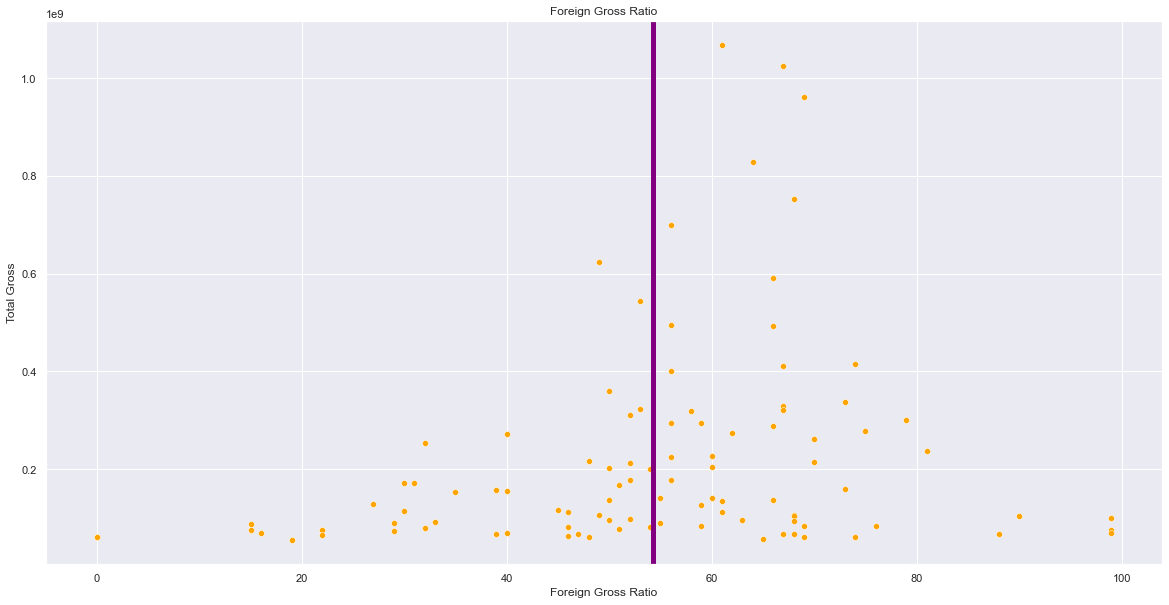

In [556]:
sns.set(style = 'darkgrid')
sns.set(rc={'figure.figsize' : (20, 10)})
plot_foreigngross_ratio = sns.scatterplot(x = 'foreign_gross_ratio',
                                          y = 'total_gross',
                                          data = df_foreigngross_ratio[ : 100],
                                          color = 'orange')
plot_foreigngross_ratio.set(xlabel = 'Foreign Gross Ratio',
                            ylabel = 'Total Gross',
                            title = 'Foreign Gross Ratio')

#Scatterplot of 100 Highest total grossing movies by foreign gross ratio.

foreigngross_ratio_mean100 = df_foreigngross_ratio[ : 100]['foreign_gross_ratio'].mean()
print('100 Highest total grossing movies foreign gross ratio mean:', foreigngross_ratio_mean100, '\n')
foreigngross_ratio_mean50 = df_foreigngross_ratio[ : 50]['foreign_gross_ratio'].mean()
print('50 Highest total grossing movies foreign gross ratio mean:', foreigngross_ratio_mean50, '\n')
foreigngross_ratio_mean25 = df_foreigngross_ratio[ : 25]['foreign_gross_ratio'].mean()
print('25 Highest total grossing movies foreign gross ratio mean:', foreigngross_ratio_mean25, '\n')

#Mean foreign gross ratios for 100, 50, and 25 highest total grossing movies.

plt.axvline(foreigngross_ratio_mean100, color = 'purple', linewidth = 5)

#Plot mean foreign gross ratio for 100 highest total grossing movies.

The movies with the highest total gross revenues converge between 55-60% foreign gross revenue ratio.

The mean foreign gross revenue increases as a narrower subset highest total gross revenues is assessed.  
* Of the 100 movies with the highest total grossing movies the foreign gross reveniue ratio mean is %54.27 
* Of the 100 movies with the highest total grossing movies the foreign gross reveniue ratio mean is %57.68 
* Of the 100 movies with the highest total grossing movies the foreign gross reveniue ratio mean is %62.08 

This indicates a correlation between the ratio of a movie's total gross revenue generated internationally and an increased the likelihood of a higher total gross.

This highlights the importance of a movie's ability to perform in foreign markets toward its ability to be financially successful.

### Average Rating

In [397]:
df_average_rating = df_imbd_info_and_gross.drop(['domestic_gross', 'foreign_gross', 'year', 'genres'], axis = 1)
df_average_rating.dropna(inplace = True)
df_average_rating['averagerating'] = df_average_rating['averagerating'].astype(int)
df_average_rating.sort_values('total_gross', ascending = False).head(25)

,total_gross,averagerating,numvotes
title,,,
Avengers Age of Ultron,1405400000,7,665594.0
Black Panther,1347000000,7,516148.0
Harry Potter and the Deathly Hallows Part 2,1341500000,8,691835.0
Star Wars The Last Jedi,1332600000,7,462903.0
Jurassic World Fallen Kingdom,1309500000,6,219125.0
Frozen,1276400000,7,516998.0
Frozen,1276400000,5,75.0
Frozen,1276400000,6,62311.0
Incredibles 2,1242800000,7,203510.0


Average rating mean: 5.890451948333288 

100 Highest total grossing movies average rating mean: 5.48 

50 Highest total grossing movies average rating mean: 5.56 

25 Highest total grossing movies average rating mean: 5.32 



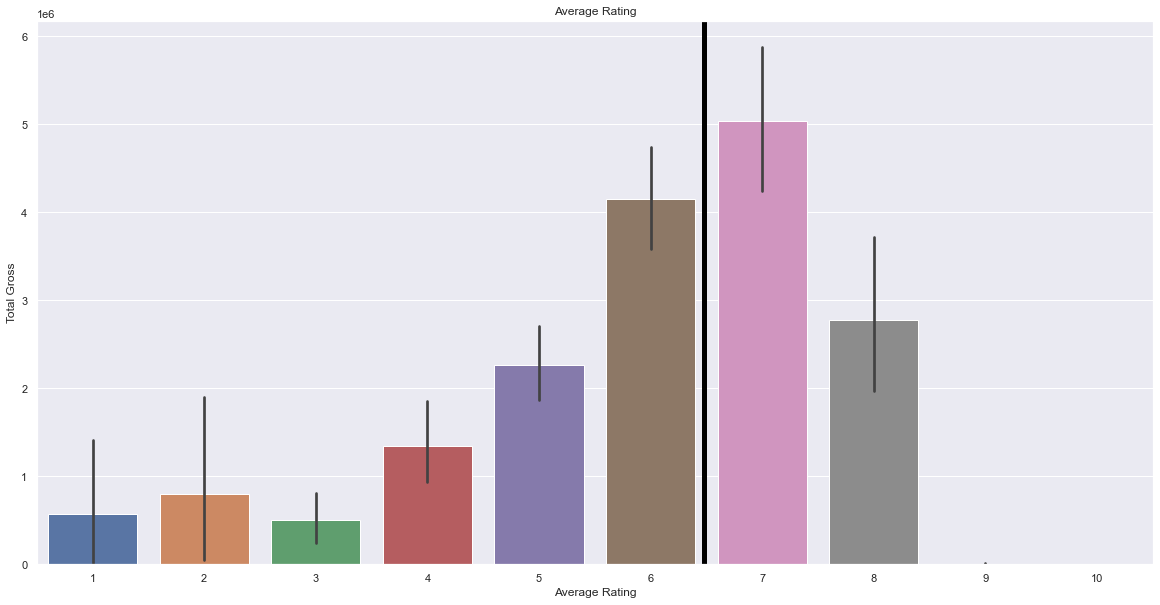

In [559]:
sns.set(style = 'darkgrid')
sns.set(rc={'figure.figsize' : (20, 10)})
plot_average_rating = sns.barplot(x = 'averagerating',
                                          y = 'total_gross',
                                          data = df_average_rating)
plot_average_rating.set(xlabel = 'Average Rating',
                            ylabel = 'Total Gross',
                            title = 'Average Rating')

#Scatterplot of 100 Highest total grossing movies by foreign gross ratio.

df_average_rating_mean = df_average_rating['averagerating'].mean()
print('Average rating mean:', df_average_rating_mean, '\n')
df_average_rating_mean100 = df_average_rating[ : 100]['averagerating'].mean()
print('100 Highest total grossing movies average rating mean:', df_average_rating_mean100, '\n')
df_average_rating_mean50 = df_average_rating[ : 50]['averagerating'].mean()
print('50 Highest total grossing movies average rating mean:', df_average_rating_mean50, '\n')
df_average_rating_mean25 = df_average_rating[ : 25]['averagerating'].mean()
print('25 Highest total grossing movies average rating mean:', df_average_rating_mean25, '\n')

#Mean average rating for 100, 50, and 25 highest total grossing movies.

plt.axvline(df_average_rating_mean100, color = 'black', linewidth = 5)

#Plot mean average rating for 100 highest total grossing movies.

The movies with the highest total gross revenues converge approximately around a mean average rating of 5.5, which is below the mean average rating for all movies within the sample, which is approximately 5.9.

This indicates that while the movies with the highest total gross revenue do typically maintain an average rating close to the mean, a movies average rating does not correlate with an increased likelihood of a higher total gross.

A movie does not have to be rated highly in order to be financially successful.

### Genre

In [526]:
df_genre = df_imbd_info_and_gross.drop(['domestic_gross', 'foreign_gross', 'year', 'averagerating', 'numvotes'], axis = 1)
df_genre.dropna(inplace = True)
genres = df_genre['genres'].str.split(",", n = 3, expand = True)
df_genre['genre1'] = genres[0]
df_genre['genre2'] = genres[1]
df_genre['genre3'] = genres[2]
df_genre = df_genre.drop('genres', axis = 1)

df_genre = df_genre.sort_values('total_gross', ascending = False)

df_genre.head(25)

,total_gross,genre1,genre2,genre3
title,,,,
Avengers Age of Ultron,1405400000,Action,Adventure,Sci-Fi
Black Panther,1347000000,Action,Adventure,Sci-Fi
Harry Potter and the Deathly Hallows Part 2,1341500000,Adventure,Drama,Fantasy
Star Wars The Last Jedi,1332600000,Action,Adventure,Fantasy
Jurassic World Fallen Kingdom,1309500000,Action,Adventure,Sci-Fi
Frozen,1276400000,Adventure,Drama,Sport
Frozen,1276400000,Fantasy,Romance,None
Frozen,1276400000,Adventure,Animation,Comedy
Incredibles 2,1242800000,Action,Adventure,Animation


In [565]:
df_genre1_count = pd.DataFrame(data = df_genre[ : 100]['genre1'].value_counts())
df_genre2_count = pd.DataFrame(data = df_genre[ : 100]['genre2'].value_counts())
df_genre3_count = pd.DataFrame(data = df_genre[ : 100]['genre3'].value_counts())

df_genre_total100 = df_genre1_count.join(df_genre2_count.join(df_genre3_count, how = 'outer'), how = 'outer')

df_genre_total100['genre1'].fillna(0, inplace = True)
df_genre_total100['genre2'].fillna(0, inplace = True)
df_genre_total100['genre3'].fillna(0, inplace = True)

df_genre_total100['genre1'].astype(int)
df_genre_total100['genre2'].astype(int)
df_genre_total100['genre3'].astype(int)

df_genre_total100['genre_total'] = df_genre_total100['genre1'] + df_genre_total100['genre2'] + df_genre_total100['genre3']

df_genre_total100 = df_genre_total100.drop(['genre1', 'genre2', 'genre3'], axis = 1)

df_genre_total100.reset_index(inplace=True)
df_genre_total100 = df_genre_total100.rename(columns = {'index' : 'genre'})

df_genre_total100 = df_genre_total100.sort_values('genre_total', ascending = False)
df_genre_total100

,genre,genre_total
1,Adventure,80.0
0,Action,58.0
15,Sci-Fi,28.0
4,Comedy,25.0
2,Animation,22.0
9,Fantasy,19.0
7,Drama,15.0
17,Thriller,13.0
8,Family,5.0
6,Documentary,3.0


<AxesSubplot:xlabel='genre', ylabel='genre_total'>

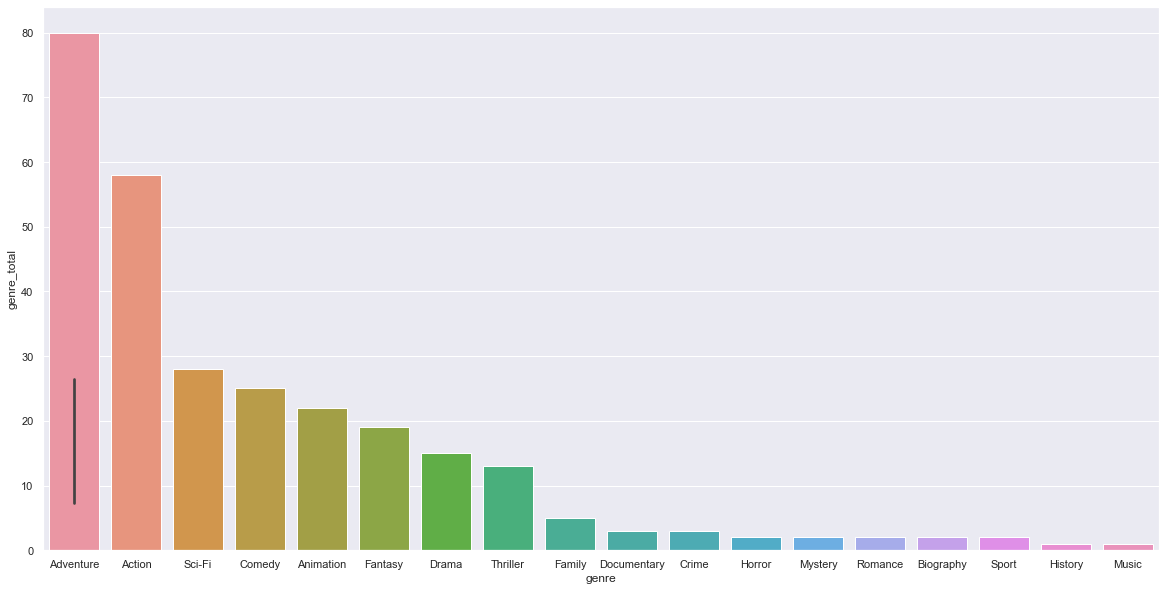

In [566]:
sns.set(style = 'darkgrid')
sns.set(rc={'figure.figsize' : (20, 10)})
plot_genre_total100 = sns.barplot(y = "genre_total", data = df_genre_total100)

sns.barplot(x = 'genre', y = 'genre_total', data = df_genre_total100)

The movies with the highest total gross revenues largely have genres of Adventure, Action, Sci-Fi, Comedy, and Animation.

This indicates a strong correlation between the genre of a movie and an increased likelihood of a higher total gross.

Each of the movies within the sample includes up to three genres, many of the highest total gross revenues have multiple of the highest grossing genres (for example, many movies which include the genre adventure also include action).

This highlights the importance of the type of movie (and combination of types) in its ability to be financially successful.

## Conclusions
Within the theoretical scenario of Microsoft seeking insight for the creation of a new movie studio, this analysis leads to three recommendations toward helping decide what type of movies to make for an increased likelihood of a higher total gross:
* **Make Movies within the Most Successful Genres** - The highest grossing movies largely have genres of Adventure, Action, Sci-Fi, Comedy, and Animation.  Many combine multiple of the highest grossing genres.


* **Focus on Foreign Markets** - The highest grossing movies tend to receive over half of their total gross from their foreign gross revenue.


* **Deemphasize Ratings** - The highest grossing movies tend to receive average ratings similar to or even below the mean.

## Next Steps
Further Analysis could potentially yield greater insights towad helping decide what type of movies to make.
* Analyze how combinations of genres impact the correlation with higher total gross.
* Analyze the relationship between a movie's genre(s) and its foreign gross ratio to find if specific genres perform better internationally.
* Analyze the relationship between a movie's genre(s) and its average rating to find if specific genres tend to perform better or worse financially based on its average rating (for example, is average rating more associated with financial success for drama or less associated for action).
* Analyze the relationship between the average rating of a movie and the number of voters to find if adjustments should be made to the metric of rating.
* Join [IMDB](https://www.imdb.com/) data regarding actors, actresses, writers, and directors involved with movies and assess if specific people in specific roles correlate with the likelihood of increased total gross revenue.
* Locate and join data regarding movie's MPAA Ratings and assess if there is a correlation with the likelihood of increased total gross revenue.
* Locate and join data regarding movie's release month during the year and assess if there is a correlation with the likelihood of increased total gross revenue (as well as if genre or MPAA rating have a relationship with the release month).